<a href="https://colab.research.google.com/github/Motsepe-Jr/pandas-tutorial/blob/master/Lead_Disease_Classification_Computer_Visionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
# Load Libraries

import tensorflow as tf
from IPython.display import Image, display

import matplotlib.pyplot as plt
import tensorflow_hub as hub

import numpy as np

import warnings 
warnings.filterwarnings('ignore')

In [115]:
# Ensure GPU is enabled
!nvidia-smi

Sat Jun  5 20:02:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    27W /  70W |   8884MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [116]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

--2021-06-05 20:02:15--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 2607:f8b0:4023:c03::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip.1’

train.zip.1         100%[===================>] 137.15M   118MB/s    in 1.2s    

2021-06-05 20:02:16 (118 MB/s) - ‘train.zip.1’ saved [143812152/143812152]

--2021-06-05 20:02:16--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘validation.zip.1’

validation.zip.1 

In [117]:
!mkdir beans

mkdir: cannot create directory ‘beans’: File exists


In [118]:
!unzip train.zip -d beans/
!unzip test.zip -d beans/
!unzip validation -d beans/

Archive:  train.zip
replace beans/train/healthy/healthy_train.265.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: beans/train/healthy/healthy_train.265.jpg  
replace beans/train/healthy/healthy_train.271.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: beans/train/healthy/healthy_train.271.jpg  
replace beans/train/healthy/healthy_train.259.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: beans/train/healthy/healthy_train.259.jpg  
replace beans/train/healthy/healthy_train.99.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: beans/train/healthy/healthy_train.99.jpg  
replace beans/train/healthy/healthy_train.311.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: beans/train/healthy/healthy_train.311.jpg  
  inflating: beans/train/healthy/healthy_train.66.jpg  
  inflating: beans/train/healthy/healthy_train.72.jpg  
  inflating: beans/train/healthy/healthy_train.305.jpg  
  inflating: beans/train/healthy/healthy_train.339.jpg  
  inflating: bea

In [119]:
!ls beans/train

angular_leaf_spot  bean_rust  healthy


In [120]:
!find beans -type f | wc - 1

   1296    1296   64308 -
wc: 1: No such file or directory
   1296    1296   64308 total


In [121]:
!find beans/test -type f | wc - 1

    128     128    5994 -
wc: 1: No such file or directory
    128     128    5994 total


In [122]:
!find beans/validation -type f | wc - 1

    133     133    6882 -
wc: 1: No such file or directory
    133     133    6882 total


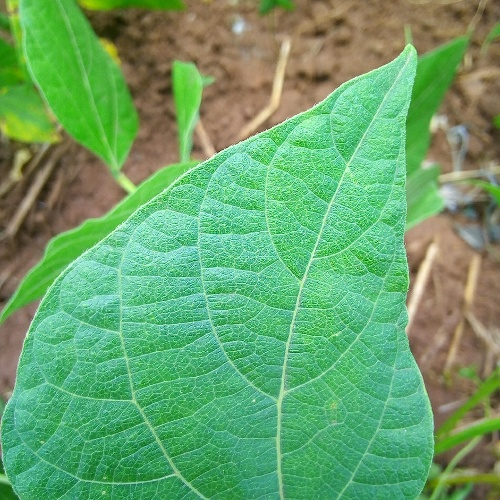

In [123]:
display(Image('beans/train/healthy/healthy_train.0.jpg'))

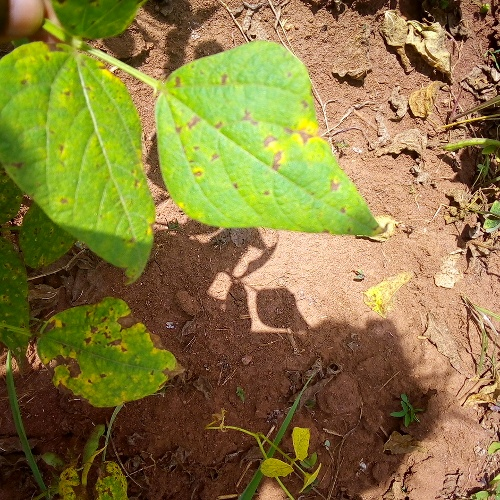

In [124]:
display(Image('/content/beans/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg'))

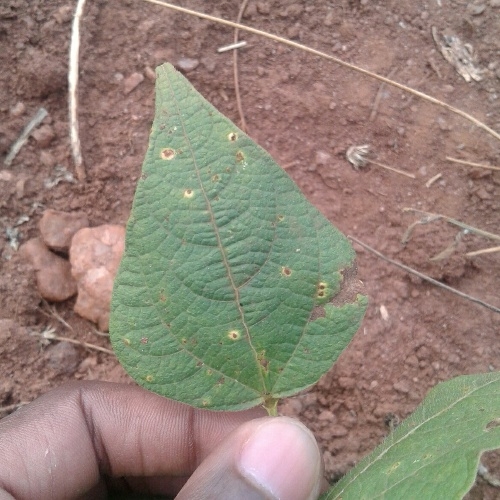

In [125]:
display(Image('/content/beans/train/bean_rust/bean_rust_train.103.jpg'))

In [126]:
batch_size = 128
img_height = 224
img_width = 224

In [127]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/train',
                                                               seed=111,
                                                               image_size =(img_height, img_width),
                                                               batch_size = batch_size)

Found 1034 files belonging to 3 classes.


In [128]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/test',
                                                               seed=111,
                                                               image_size =(img_height, img_width),
                                                               batch_size = batch_size)

Found 128 files belonging to 3 classes.


In [129]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/validation',
                                                               seed=111,
                                                               image_size =(img_height, img_width),
                                                               batch_size = batch_size)

Found 133 files belonging to 3 classes.


In [130]:
for img_batch, labels_batch in train_ds:
  print(img_batch.shape)
  print(labels_batch[5])
  break

(128, 224, 224, 3)
tf.Tensor(2, shape=(), dtype=int32)


In [131]:
classes = train_ds.class_names
print(classes)

['angular_leaf_spot', 'bean_rust', 'healthy']


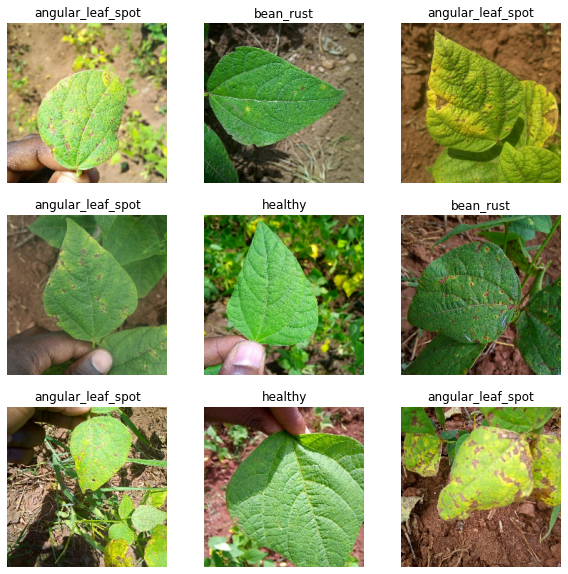

In [132]:
plt.figure(figsize=(10, 10))
for image, labels in train_ds.take(1): # take one batch
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(classes[labels[i]])
    plt.axis('off')


In [133]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [134]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [135]:
feature_extractor_layer = hub.KerasLayer(feature_extractor, input_shape=(img_height, img_width, 3))

In [136]:
feature_extractor_layer.trainable = False

In [137]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [138]:
tf.random.set_seed(111)

In [139]:
model = tf.keras.Sequential([
                             normalization_layer,
                             feature_extractor_layer,
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(3, activation='softmax')
])

In [140]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [141]:
history = model.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
9/9 [==============================] - 7s 240ms/step - loss: 1.0959 - accuracy: 0.4778 - val_loss: 0.7555 - val_accuracy: 0.7068
Epoch 2/20
9/9 [==============================] - 1s 143ms/step - loss: 0.7777 - accuracy: 0.6605 - val_loss: 0.6006 - val_accuracy: 0.7519
Epoch 3/20
9/9 [==============================] - 1s 145ms/step - loss: 0.6351 - accuracy: 0.7176 - val_loss: 0.5350 - val_accuracy: 0.7820
Epoch 4/20
9/9 [==============================] - 1s 143ms/step - loss: 0.5669 - accuracy: 0.7582 - val_loss: 0.4910 - val_accuracy: 0.7744
Epoch 5/20
9/9 [==============================] - 1s 142ms/step - loss: 0.5152 - accuracy: 0.7921 - val_loss: 0.4604 - val_accuracy: 0.7970
Epoch 6/20
9/9 [==============================] - 1s 144ms/step - loss: 0.4773 - accuracy: 0.8095 - val_loss: 0.4379 - val_accuracy: 0.7895
Epoch 7/20
9/9 [==============================] - 1s 142ms/step - loss: 0.4353 - accuracy: 0.8327 - val_loss: 0.4194 - val_accuracy: 0.8195
Epoch 8/20
9/9 [====

In [152]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


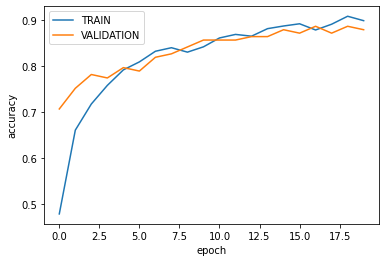

In [143]:
plt.plot(history.history['accuracy'], label='TRAIN')
plt.plot(history.history['val_accuracy'], label='VALIDATION')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend();

In [144]:
result = model.evaluate(test_ds)

1/1 [==============================] - 0s 424ms/step - loss: 0.2881 - accuracy: 0.8828


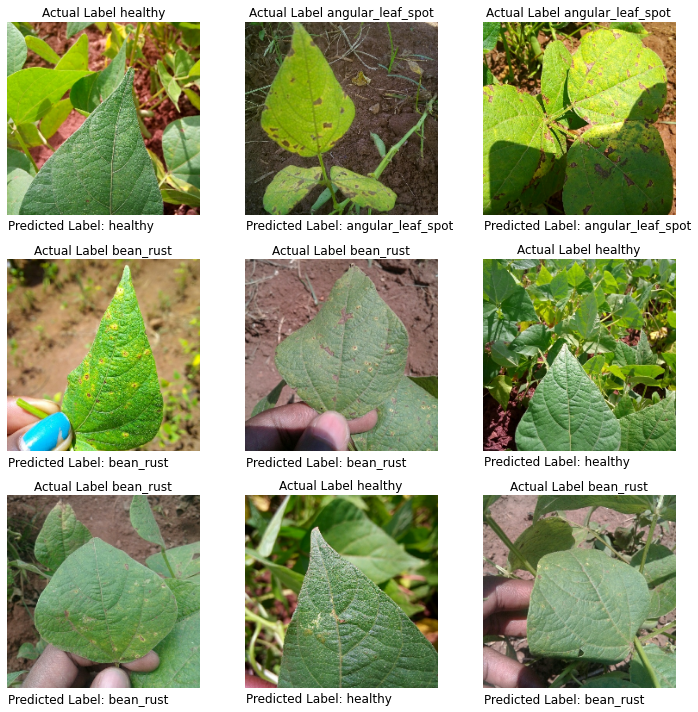

In [145]:
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)

    plt.tight_layout()

    img = tf.keras.preprocessing.image.img_to_array(images[i])

    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)

    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title('Actual Label %s' % classes[labels[i]])
    plt.text(1, 240, "Predicted Label: %s" % classes[np.argmax(pred)], fontsize=12)

    plt.axis('off')
   

In [146]:
model.save('./models', save_format='tf')

INFO:tensorflow:Assets written to: ./models/assets


INFO:tensorflow:Assets written to: ./models/assets


In [147]:
!ls models

assets	keras_metadata.pb  saved_model.pb  variables


In [148]:
model_loaded = tf.keras.models.load_model('./models')

In [149]:
model_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3843      
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [153]:
# Lets try to predict on a single image
from PIL import Image
import numpy as np
from skimage import transform

def process(filename):
  np_image = Image.open(filename)
  np_image = np.array(np_image).astype('float32') 3 do not use int, because the argmax uses propabilites
  np_image = transform.resize(np_image, (224, 224, 3))
  np_image = np.expand_dims(np_image, axis=0)
  return np_image


In [154]:
pred_label = model_loaded.predict(process('/content/beans/test/healthy/healthy_test.12.jpg'))
print(classes[np.argmax(pred_label)])

healthy


In [155]:
pred_label

array([[0.01412171, 0.03132724, 0.95455104]], dtype=float32)

In [156]:
!zip -r models.zip models/

  adding: models/ (stored 0%)
  adding: models/assets/ (stored 0%)
  adding: models/variables/ (stored 0%)
  adding: models/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: models/variables/variables.index (deflated 78%)
  adding: models/saved_model.pb (deflated 92%)
  adding: models/keras_metadata.pb (deflated 82%)


In [157]:
print(tf.__version__)

2.5.0
